In [16]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

# Data Overview
print(data.info())
print(data.describe())
print(data.isnull().sum())  # Checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156612 entries, 0 to 156611
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    156612 non-null  float64
 1   V1      156612 non-null  float64
 2   V2      156611 non-null  float64
 3   V3      156611 non-null  float64
 4   V4      156611 non-null  float64
 5   V5      156611 non-null  float64
 6   V6      156611 non-null  float64
 7   V7      156611 non-null  float64
 8   V8      156611 non-null  float64
 9   V9      156611 non-null  float64
 10  V10     156611 non-null  float64
 11  V11     156611 non-null  float64
 12  V12     156611 non-null  float64
 13  V13     156611 non-null  float64
 14  V14     156611 non-null  float64
 15  V15     156611 non-null  float64
 16  V16     156611 non-null  float64
 17  V17     156611 non-null  float64
 18  V18     156611 non-null  float64
 19  V19     156611 non-null  float64
 20  V20     156611 non-null  float64
 21  V21     15

In [4]:
data = data.dropna(subset=['Class'])

# Splitting features and labels
X = data.drop(columns=['Class'])
y = data['Class']

# Normalization of the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling class imbalance using SMOTE (Oversampling the minority class)
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Splitting the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)



In [5]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [6]:
# Evaluate the model (Precision, Recall, F1-Score)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46940
         1.0       1.00      1.00      1.00     46817

    accuracy                           1.00     93757
   macro avg       1.00      1.00      1.00     93757
weighted avg       1.00      1.00      1.00     93757

Confusion Matrix:
 [[46923    17]
 [    0 46817]]


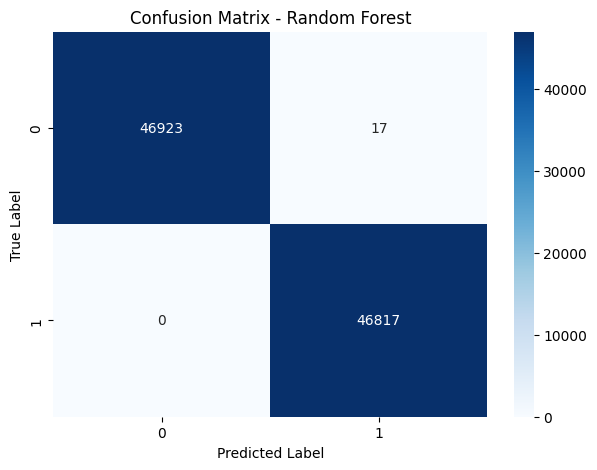

In [7]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [8]:
# Precision-Recall and F1-score display
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.9996
Recall: 1.0000
F1-Score: 0.9998


In [17]:
# Example of a new transaction with 30 features
new_transaction = [[34567, -2.312226, 1.951993, -1.391657, -1.150297, -2.254491, -0.199037, -0.261178, -0.430682, 1.204001,
                    0.542278, -0.073305, -0.073529, -0.204970, 1.031134, 0.465211, -0.094567, -2.334213, 0.515320,
                    -0.936233, -0.241626, 0.486180, 0.374807, -0.007318, -0.001897, 0.001778, 0.000383, -0.000040,
                    0.000074, 1500]]  # 30 features
# Preprocess the input using the same scaler (with the correct feature count)
new_transaction_scaled = scaler.transform(new_transaction)

# Make a prediction using the trained Random Forest model
prediction = rf_model.predict(new_transaction_scaled)

# Output the result
if prediction == 1:
    print("Prediction: Fraudulent transaction")
else:
    print("Prediction: Legitimate transaction")



Prediction: Legitimate transaction


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


['random_forest_model.pkl']